# FDA Hw3 predict stock

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# import svm package
from sklearn import datasets 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# for logistic regression
from sklearn import linear_model, model_selection, metrics
from sklearn.linear_model import LogisticRegression

# nerual network
from keras import models, layers, optimizers, regularizers
from keras.models import Model

stock_data = pd.read_csv('stock_data.csv')
stock_data.head()


Using TensorFlow backend.


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [2]:
stock_data['move open'] = None
stock_data['move close'] = None
stock_data['move high'] = None
stock_data['move low'] = None
stock_data['move volume'] = None


# 預測明天股價
如果明天的股價比今天的高則move1值為，相反為0

舉例來說:
    明天的Open Price大於今天的Open Price則，今天的move open為1，反之為0

In [3]:
for i in range(1, stock_data.shape[0]):
    # open price
    if (stock_data.iloc[i, 1] > stock_data.iloc[i - 1, 1]):
        stock_data.iloc[i - 1, 6] = 1
    else:
        stock_data.iloc[i - 1, 6] = 0
        
    # close price
    if (stock_data.iloc[i, 2] > stock_data.iloc[i - 1, 2]):
        stock_data.iloc[i - 1, 7] = 1
    else:
        stock_data.iloc[i - 1, 7] = 0
    
    # high price
    if (stock_data.iloc[i, 3] > stock_data.iloc[i - 1, 3]):
        stock_data.iloc[i - 1, 8] = 1
    else:
        stock_data.iloc[i - 1, 8] = 0
    
    # low price
    if (stock_data.iloc[i, 4] > stock_data.iloc[i - 1, 4]):
        stock_data.iloc[i - 1, 9] = 1
    else:
        stock_data.iloc[i - 1, 9] = 0
    
    # volume
    if (stock_data.iloc[i, 5] > stock_data.iloc[i - 1, 5]):
        stock_data.iloc[i - 1, 10] = 1
    else:
        stock_data.iloc[i - 1, 10] = 0

stock_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,move open,move close,move high,move low,move volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1,0,1,1,1
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1,1,1,1,0
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0,0,0,0,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0,1,0,0,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1,0,1,0,0


# Normalize all attribute
為了方便比較，將所有資料的數值正規劃

In [4]:
st_op = stock_data['Open Price']
st_cp = stock_data['Close Price']
st_hp = stock_data['High Price']
st_lp = stock_data['Low Price']
st_vl = stock_data['Volume']

# normalized open price
def op_nor (num):
    return (num - st_op.min()) / (st_op.max() - st_op.min())


# normalized close price
def cp_nor (num):
    return (num - st_cp.min()) / (st_cp.max() - st_cp.min())

# normalized high price
def hp_nor (num):
    return (num - st_hp.min()) / (st_hp.max() - st_hp.min())

# normalized low price
def lp_nor (num):
    return (num - st_lp.min()) / (st_lp.max() - st_lp.min())

# normalized volume
def vl_nor (num):
    return (num - st_vl.min()) / (st_vl.max() - st_vl.min())

stock_data['nor op'] = stock_data['Open Price'].apply(op_nor)
stock_data['nor cp'] = stock_data['Close Price'].apply(cp_nor)
stock_data['nor hp'] = stock_data['High Price'].apply(hp_nor)
stock_data['nor lp'] = stock_data['Low Price'].apply(lp_nor)
stock_data['nor vl'] = stock_data['Volume'].apply(vl_nor)

stock_data.describe()

,Open Price,Close Price,High Price,Low Price,Volume,nor op,nor cp,nor hp,nor lp,nor vl
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,1765.493029,1765.867067,1774.433740,1755.869141,2.869158e+09,0.481162,0.483243,0.480560,0.481825,0.273310
std,566.003293,565.538751,566.671163,564.789277,1.312045e+09,0.250724,0.250880,0.252343,0.249871,0.152529
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1278.175000,1278.315000,1286.160000,1268.235000,2.016047e+09,0.265294,0.266959,0.263128,0.266088,0.174134
50%,1806.270000,1805.450000,1810.450000,1800.675000,2.425113e+09,0.499225,0.500803,0.496598,0.501648,0.221689
75%,2122.492500,2124.222500,2129.150000,2113.325000,3.248909e+09,0.639302,0.642214,0.638517,0.639969,0.317457
max,2936.760000,2930.750000,2940.910000,2927.110000,9.120100e+09,1.000000,1.000000,1.000000,1.000000,1.000000


# 正規劃後資料隨時間的變化
從下圖可以明顯觀察到volume與其他數據關係不大，open price、close price、high price和low price具有高度正相關。

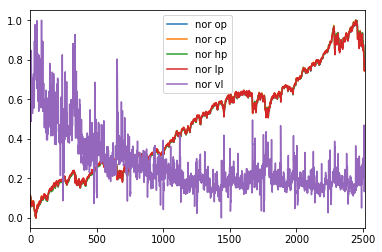

In [5]:
stock_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']].plot()

# 將資料分成訓練資料與測試資料


In [6]:
train_data = stock_data.iloc[0:2264]
test_data = stock_data.iloc[2264:2515] # don't use the last one
# train data
x_train = train_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_train = train_data[['move open', 'move close', 'move high', 'move low', 'move volume']]

# test data
x_test = test_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_test = test_data[['move open', 'move close', 'move high', 'move low', 'move volume']]

# standard data
x_train_std = train_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']]
x_test_std = test_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']]

# 產生比較的依據
看全部猜對的機率，得出來結果為54.4%左右，希望目標能差越這個數字

In [7]:
y_ans = pd.Series(stock_data['move close'])
y_ans = y_ans[:2514]
y_ans = y_ans.astype('int')
fake_guess = list(1 for i in range(0, 2514))
fake_guess = pd.Series(fake_guess)
basic_acc = accuracy_score(fake_guess, y_ans)
print('basic accuracy: %s' % basic_acc)

basic accuracy: 0.5437549721559268


# SVM
第一次得出來的結果不是很理想，train的準確率只比全部猜長的準確率高了0.5%，測試資料更慘連一半的機率都不到，可以算是完全失敗。

！！！因為跑很久先反白，但實際跑得出來！！！

In [8]:
#penalty = 0.05
#svm = SVC(C=penalty, kernel='linear', probability=True)

#y_train = y_train.astype('int')   # 將資料轉型
#svm.fit(x_train[['Open Price', 'Close Price', 'High Price', 'Low Price']], y_train['move close'])
#y_test = y_test.astype('int')
#y_train = y_train.astype('int')
#acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price', 'High Price', 'Low Price']]))
#acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price', 'High Price', 'Low Price']]))
#print('test accuracy: %s' % acc_rate_test)
#print('train accuracy: %s' % acc_rate_train)

# 試著減少餵給svm的參數
只餵svm 'open price'和'close price'，神奇的是發生了，svm的準確率上升了，可以說明上個步驟為太多參數可能導致overfitting

In [9]:
penalty = 0.05
svm = SVC(C=penalty, kernel='linear', probability=True)

y_train = y_train.astype('int')   # 將資料轉型
svm.fit(x_train[['Open Price', 'Close Price']], y_train['move close'])
y_test = y_test.astype('int')
y_train = y_train.astype('int')
acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price']]))
acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price']]))
print('test accuracy: %s' % acc_rate_test)
print('train accuracy: %s' % acc_rate_train)

test accuracy: 0.5179282868525896
train accuracy: 0.5463780918727915


In [10]:
def svn_try(penalty, kernel):
    global x_train, x_test, y_test, y_train
    svm = SVC(C=penalty, kernel=kernel, probability=True)

    y_train = y_train.astype('int')   # 將資料轉型
    svm.fit(x_train[['Open Price', 'Close Price']], y_train['move close'])
    y_test = y_test.astype('int')
    y_train = y_train.astype('int')
    acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price']]))
    acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price']]))
    print('test accuracy: %s' % acc_rate_test)
    print('train accuracy: %s' % acc_rate_train)

In [11]:
svn_try(0.1, 'linear')

test accuracy: 0.5258964143426295
train accuracy: 0.5459363957597173


In [12]:
svn_try(1, 'linear')

test accuracy: 0.5258964143426295
train accuracy: 0.5459363957597173


In [13]:

svn_try(0.01, 'sigmoid')

/home/jack/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test accuracy: 0.5219123505976095
train accuracy: 0.5463780918727915


# logistic regression 
logistic regression出來結果跟svm的結果差不多，效果並不是很好，測試資料的結果還是全部猜對還來的低。
從下面的結果可以看出有正規劃和沒正規劃的結果對logistic regression沒有影響

In [14]:
def logistic(x_train, y_train, x_test, y_test):
    lrm = LogisticRegression().fit(x_train, y_train['move close'])
    acc_train = accuracy_score(y_train['move close'], lrm.predict(x_train))
    acc_test = accuracy_score(y_test['move close'], lrm.predict(x_test))
    print('    train accuracy: %s' % acc_train)
    print('    test accuracy: %s' % acc_test)

In [15]:
print("沒有正規劃準確率")
logistic(x_train, y_train, x_test, y_test)

沒有正規劃準確率
    train accuracy: 0.5463780918727915
    test accuracy: 0.5219123505976095


/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print("正規劃準確率")
logistic(x_train_std, y_train, x_test_std, y_test)

正規劃準確率
    train accuracy: 0.5463780918727915
    test accuracy: 0.5219123505976095


/home/jack/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Gradient Descent Model
嘗試使用Gradient Descent Model，結果反而更慘連一半都沒有。

***Reference***
- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [17]:
# def logistic_regression (x_data, y_data, )
re_model = linear_model.SGDClassifier(loss='hinge', max_iter=100000, tol=-np.infty)
re_model.fit(x_train, y_train['move close'])
acc_rate_train = accuracy_score(y_train['move close'], re_model.predict(x_train))
acc_rate_test = accuracy_score(y_test['move close'], re_model.predict(x_test))


# normalizse
print('traning data準確率: %s' % acc_rate_train)
print('testing data準確率: %s' % acc_rate_test)

traning data準確率: 0.5463780918727915
testing data準確率: 0.5219123505976095


# Neural Network
一開始沒有條什麼參數，得出來的準確率不到一半，因為learning rate沒有調好，所得到的history不斷震盪。

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2264/2264 [==============================] - 0s 81us/step - loss: 8.8066 - acc: 0.4536
Epoch 2/20
2264/2264 [==============================] - 0s 21us/step - loss: 8.8066 - acc: 0.4536
Epoch 3/20
2264/2264 [==============================] - 0s 21us/step - loss: 8.8066 - acc: 0.4536
Epoch 4/20
2264/2264 [==============================] - 0s 24us/step - loss: 8.8066 - acc: 0.4536
Epoch 5/20
2264/2264 [==============================] - 0s 22us/step - loss: 8.8066 - acc: 0.4536
Epoch 6/20
2264/2264 [==============================] - 0s 21us/step - loss: 8.8066 - acc: 0.4536
Epoch 7/20
2264/2264 [==============================] - 0s 26us/step - loss: 8.8066 - acc: 0.4536
Epoch 8/20
2264/2264 [==============================] - 0s 25us/step - loss: 8.8066 - acc: 0.4536
Epoch 9/20
2264/2264 [==============================] - 0s 19us/step - loss: 8.8066 - acc: 0.453

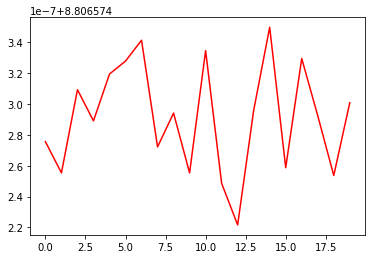

2264/2264 [==============================] - 0s 22us/step
train accuracy: 0.4536219081272085
251/251 [==============================] - 0s 11us/step
test accuracy: 0.4780876522520149


In [18]:
hidden_units = 10
activation = 'relu'
penalize = 0.001
learning_rate = 0.1
epochs = 20
batch_size = 32 

model = models.Sequential()


# hidden layer
model.add(layers.Dense(input_dim = 5,
                       units = hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim = hidden_units,
                       units = 1,
                       activation=activation))

# loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train, y_train['move close'], epochs=epochs, batch_size=batch_size) 


losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

train_acc = model.evaluate(x_train, y_train['move close'], batch_size = batch_size)[1]
print('train accuracy: %s' % train_acc)
test_acc = model.evaluate(x_test, y_test['move close'], batch_size = batch_size)[1]
print('test accuracy: %s' % test_acc)

# 經過調整參數後
learning圖的狀況比較正常，準確率卻跟svm和logistic regression都差不多

Epoch 1/100
2264/2264 [==============================] - 0s 58us/step - loss: 0.9263 - acc: 0.4536
Epoch 2/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.9047 - acc: 0.4536
Epoch 3/100
2264/2264 [==============================] - 0s 4us/step - loss: 0.8837 - acc: 0.4536
Epoch 4/100
2264/2264 [==============================] - 0s 3us/step - loss: 0.8642 - acc: 0.4536
Epoch 5/100
2264/2264 [==============================] - 0s 4us/step - loss: 0.8452 - acc: 0.4536
Epoch 6/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.8283 - acc: 0.4536
Epoch 7/100
2264/2264 [==============================] - 0s 5us/step - loss: 0.8118 - acc: 0.4536
Epoch 8/100
2264/2264 [==============================] - 0s 4us/step - loss: 0.7969 - acc: 0.4536
Epoch 9/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.7837 - acc: 0.4536
Epoch 10/100
2264/2264 [==============================] - 0s 4us/step - loss: 0.7713 - acc: 0.4536
Epoch 11/100
2264/

2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 84/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 85/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 86/100
2264/2264 [==============================] - 0s 3us/step - loss: 0.6888 - acc: 0.5464
Epoch 87/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 88/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 89/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 90/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 91/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 92/100
2264/2264 [==============================] - 0s 2us/step - loss: 0.6888 - acc: 0.5464
Epoch 93/100
2264/2264 

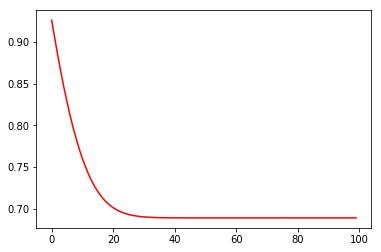

2264/2264 [==============================] - 0s 14us/step
train accuracy: 0.5463780967169852
251/251 [==============================] - 0s 2us/step
test accuracy: 0.5219123363494873


In [19]:
hidden_units = 20
activation = 'sigmoid'
penalize = 0.01
learning_rate = 0.001
epochs = 100
batch_size = 500 

model = models.Sequential()


# hidden layer
model.add(layers.Dense(input_dim = 5,
                       units = hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim = hidden_units,
                       units = 1,
                       activation=activation))

# loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train, y_train['move close'], epochs=epochs, batch_size=batch_size) 

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

train_acc = model.evaluate(x_train, y_train['move close'], batch_size = batch_size)[1]
print('train accuracy: %s' % train_acc)
test_acc = model.evaluate(x_test, y_test['move close'], batch_size = batch_size)[1]
print('test accuracy: %s' % test_acc)

# 推論
三個模型不管怎麼調，最佳的準確率三個都差不多，有可能有以下可能:
1. 以上參數不足以預估股票的漲跌
2. 股票的隨機性太大，沒有一個完美的方法去預測
3. 股票是連續性的變化(並不是指受一天的變化影響)，必須把先前的每天納入考量

因此嘗試使用第三個想法將之前的股價也納入考量

# 加入前一天的股價

In [20]:
x_train.describe()

,Open Price,Close Price,High Price,Low Price,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,1656.142686,1656.767562,1664.427054,1647.425128,2.948755e+09
std,485.292193,485.226120,484.808706,485.576116,1.351675e+09
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08
25%,1238.602500,1239.337500,1246.695000,1227.587500,2.048980e+09
50%,1649.135000,1650.405000,1656.145000,1639.600000,2.506637e+09
75%,2070.300000,2071.190000,2079.507500,2058.757500,3.373334e+09
max,2692.710000,2690.160000,2694.970000,2685.920000,9.120100e+09


In [21]:
x_train['op1'] = [None] + x_train.loc[0:2262, 'Open Price'].tolist()   # 一天前open price
x_train['cl1'] = [None] + x_train.loc[0:2262, 'Close Price'].tolist()   # 一天前close price
x_train['hp1'] = [None] + x_train.loc[0:2262, 'High Price'].tolist()   # 一天前high price
x_train['lp1'] = [None] + x_train.loc[0:2262, 'Low Price'].tolist()   # 一天前low price
x_train['vl1'] = [None] + x_train.loc[0:2262, 'Volume'].tolist()   # 一天前volume
x_train.head()

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,Open Price,Close Price,High Price,Low Price,Volume,op1,cl1,hp1,lp1,vl1
0,902.99,931.80,934.73,899.35,4048270080,NaN,NaN,NaN,NaN,NaN
1,929.17,927.45,936.63,919.53,5413910016,902.99,931.80,934.73,899.35,4.048270e+09
2,931.17,934.70,943.85,927.28,5392620032,929.17,927.45,936.63,919.53,5.413910e+09
3,927.45,906.65,927.45,902.37,4704940032,931.17,934.70,943.85,927.28,5.392620e+09
4,905.73,909.73,910.00,896.81,4991549952,927.45,906.65,927.45,902.37,4.704940e+09


In [22]:
x_test['op1'] = [None] + x_test.loc[2264:2513, 'Open Price'].tolist()   # 一天前open price
x_test['cl1'] = [None] + x_test.loc[2264:2513, 'Close Price'].tolist()   # 一天前close price
x_test['hp1'] = [None] + x_test.loc[2264:2513, 'High Price'].tolist()   # 一天前high price
x_test['lp1'] = [None] + x_test.loc[2264:2513, 'Low Price'].tolist()   # 一天前low price
x_test['vl1'] = [None] + x_test.loc[2264:2513, 'Volume'].tolist()   # 一天前volume

x_test.head()

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,Open Price,Close Price,High Price,Low Price,Volume,op1,cl1,hp1,lp1,vl1
2264,2683.73,2695.81,2695.89,2682.36,1846463232,NaN,NaN,NaN,NaN,NaN
2265,2697.85,2713.06,2714.37,2697.77,2090595328,2683.73,2695.81,2695.89,2682.36,1.846463e+09
2266,2719.31,2723.99,2729.29,2719.07,2100767744,2697.85,2713.06,2714.37,2697.77,2.090595e+09
2267,2731.33,2743.15,2743.45,2727.92,1918869120,2719.31,2723.99,2729.29,2719.07,2.100768e+09
2268,2742.67,2747.71,2748.51,2737.60,1894823936,2731.33,2743.15,2743.45,2727.92,1.918869e+09


In [23]:
x_train_new = x_train[1:2262]
y_train_new = y_train[1:2262]
x_test_new = x_test[1:251]
y_test_new = y_test[1:251]

# 多加一天的股價並沒有對準確率提昇多少

Epoch 1/200
2261/2261 [==============================] - 0s 66us/step - loss: 0.6958 - acc: 0.5387
Epoch 2/200
2261/2261 [==============================] - 0s 7us/step - loss: 0.6955 - acc: 0.5387
Epoch 3/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6952 - acc: 0.5387
Epoch 4/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6951 - acc: 0.5387
Epoch 5/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6949 - acc: 0.5387
Epoch 6/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6946 - acc: 0.5387
Epoch 7/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6945 - acc: 0.5387
Epoch 8/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6942 - acc: 0.5387
Epoch 9/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6941 - acc: 0.5387
Epoch 10/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6939 - acc: 0.5387
Epoch 11/200
2261/

2261/2261 [==============================] - 0s 5us/step - loss: 0.6894 - acc: 0.5431
Epoch 84/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6894 - acc: 0.5431
Epoch 85/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6895 - acc: 0.5431
Epoch 86/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6895 - acc: 0.5431
Epoch 87/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6894 - acc: 0.5431
Epoch 88/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6895 - acc: 0.5431
Epoch 89/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6894 - acc: 0.5431
Epoch 90/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6895 - acc: 0.5431
Epoch 91/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6893 - acc: 0.5431
Epoch 92/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6894 - acc: 0.5431
Epoch 93/200
2261/2261 

2261/2261 [==============================] - 0s 4us/step - loss: 0.6888 - acc: 0.5431
Epoch 166/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6890 - acc: 0.5431
Epoch 167/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6888 - acc: 0.5431
Epoch 168/200
2261/2261 [==============================] - 0s 6us/step - loss: 0.6889 - acc: 0.5431
Epoch 169/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6888 - acc: 0.5431
Epoch 170/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6889 - acc: 0.5471
Epoch 171/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6889 - acc: 0.5458
Epoch 172/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6888 - acc: 0.5431
Epoch 173/200
2261/2261 [==============================] - 0s 4us/step - loss: 0.6888 - acc: 0.5431
Epoch 174/200
2261/2261 [==============================] - 0s 5us/step - loss: 0.6888 - acc: 0.5431
Epoch 175/200


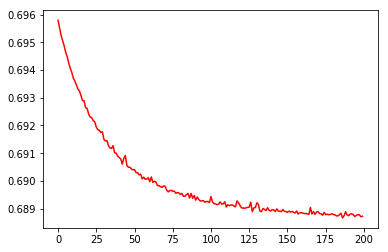

2261/2261 [==============================] - 0s 19us/step
train accuracy: 0.547545330654146
250/250 [==============================] - 0s 10us/step
test accuracy: 0.5160000007152558


In [24]:
hidden_units = 20
activation = 'sigmoid'
penalize = 0.01
learning_rate = 0.001
epochs = 200
batch_size = 200 

model = models.Sequential()


# hidden layer
model.add(layers.Dense(input_dim = 10,
                       units = hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim = hidden_units,
                       units = 1,
                       activation=activation))

# loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new['move close'], epochs=epochs, batch_size=batch_size) 

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

train_acc = model.evaluate(x_train_new, y_train_new['move close'], batch_size = batch_size)[1]
print('train accuracy: %s' % train_acc)
test_acc = model.evaluate(x_test_new, y_test_new['move close'], batch_size = 32)[1]
print('test accuracy: %s' % test_acc)

# 有可能是天數不足，因此增加到四天的股票資料

In [25]:
x_train['op2'] = [None, None] + x_train.loc[0:2261, 'Open Price'].tolist()   # 2天前open price
x_train['cl2'] = [None, None] + x_train.loc[0:2261, 'Close Price'].tolist()   # 2天前close price
x_train['hp2'] = [None, None] + x_train.loc[0:2261, 'High Price'].tolist()   # 2天前high price
x_train['lp2'] = [None, None] + x_train.loc[0:2261, 'Low Price'].tolist()   # 2天前low price
x_train['vl2'] = [None, None] + x_train.loc[0:2261, 'Volume'].tolist()   # 2天前volume

x_train['op3'] = [None, None, None] + x_train.loc[0:2260, 'Open Price'].tolist()   # 3天前open price
x_train['cl3'] = [None, None, None] + x_train.loc[0:2260, 'Close Price'].tolist()   # 3天前close price
x_train['hp3'] = [None, None, None] + x_train.loc[0:2260, 'High Price'].tolist()   # 3天前high price
x_train['lp3'] = [None, None, None] + x_train.loc[0:2260, 'Low Price'].tolist()   # 3天前low price
x_train['vl3'] = [None, None, None] + x_train.loc[0:2260, 'Volume'].tolist()   # 3天前volume

x_train['op4'] = [None, None, None, None] + x_train.loc[0:2259, 'Open Price'].tolist()   # 4天前open price
x_train['cl4'] = [None, None, None, None] + x_train.loc[0:2259, 'Close Price'].tolist()   # 4天前close price
x_train['hp4'] = [None, None, None, None] + x_train.loc[0:2259, 'High Price'].tolist()   # 4天前high price
x_train['lp4'] = [None, None, None, None] + x_train.loc[0:2259, 'Low Price'].tolist()   # 4天前low price
x_train['vl4'] = [None, None, None, None] + x_train.loc[0:2259, 'Volume'].tolist()   # 4天前volume

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [26]:
x_train.head()

,Open Price,Close Price,High Price,Low Price,Volume,op1,cl1,hp1,lp1,vl1,...,op3,cl3,hp3,lp3,vl3,op4,cl4,hp4,lp4,vl4
0,902.99,931.80,934.73,899.35,4048270080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,929.17,927.45,936.63,919.53,5413910016,902.99,931.80,934.73,899.35,4.048270e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,931.17,934.70,943.85,927.28,5392620032,929.17,927.45,936.63,919.53,5.413910e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,927.45,906.65,927.45,902.37,4704940032,931.17,934.70,943.85,927.28,5.392620e+09,...,902.99,931.80,934.73,899.35,4.048270e+09,NaN,NaN,NaN,NaN,NaN
4,905.73,909.73,910.00,896.81,4991549952,927.45,906.65,927.45,902.37,4.704940e+09,...,929.17,927.45,936.63,919.53,5.413910e+09,902.99,931.8,934.73,899.35,4.048270e+09


In [27]:
x_test['op2'] = [None, None] + x_test.loc[2264:2512, 'Open Price'].tolist()   # 2天前open price
x_test['cl2'] = [None, None] + x_test.loc[2264:2512, 'Close Price'].tolist()   # 2天前close price
x_test['hp2'] = [None, None] + x_test.loc[2264:2512, 'High Price'].tolist()   # 2天前high price
x_test['lp2'] = [None, None] + x_test.loc[2264:2512, 'Low Price'].tolist()   # 2天前low price
x_test['vl2'] = [None, None] + x_test.loc[2264:2512, 'Volume'].tolist()   # 2天前volume

x_test['op3'] = [None, None, None] + x_test.loc[2264:2511, 'Open Price'].tolist()   # 3天前open price
x_test['cl3'] = [None, None, None] + x_test.loc[2264:2511, 'Close Price'].tolist()   # 3天前close price
x_test['hp3'] = [None, None, None] + x_test.loc[2264:2511, 'High Price'].tolist()   # 3天前high price
x_test['lp3'] = [None, None, None] + x_test.loc[2264:2511, 'Low Price'].tolist()   # 3天前low price
x_test['vl3'] = [None, None, None] + x_test.loc[2264:2511, 'Volume'].tolist()   # 3天前volume

x_test['op4'] = [None, None, None, None] + x_test.loc[2264:2510, 'Open Price'].tolist()   # 4天前open price
x_test['cl4'] = [None, None, None, None] + x_test.loc[2264:2510, 'Close Price'].tolist()   # 4天前close price
x_test['hp4'] = [None, None, None, None] + x_test.loc[2264:2510, 'High Price'].tolist()   # 4天前high price
x_test['lp4'] = [None, None, None, None] + x_test.loc[2264:2510, 'Low Price'].tolist()   # 4天前low price
x_test['vl4'] = [None, None, None, None] + x_test.loc[2264:2510, 'Volume'].tolist()   # 4天前volume

/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [28]:
x_test.head()

,Open Price,Close Price,High Price,Low Price,Volume,op1,cl1,hp1,lp1,vl1,...,op3,cl3,hp3,lp3,vl3,op4,cl4,hp4,lp4,vl4
2264,2683.73,2695.81,2695.89,2682.36,1846463232,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2265,2697.85,2713.06,2714.37,2697.77,2090595328,2683.73,2695.81,2695.89,2682.36,1.846463e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2266,2719.31,2723.99,2729.29,2719.07,2100767744,2697.85,2713.06,2714.37,2697.77,2.090595e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2267,2731.33,2743.15,2743.45,2727.92,1918869120,2719.31,2723.99,2729.29,2719.07,2.100768e+09,...,2683.73,2695.81,2695.89,2682.36,1.846463e+09,NaN,NaN,NaN,NaN,NaN
2268,2742.67,2747.71,2748.51,2737.60,1894823936,2731.33,2743.15,2743.45,2727.92,1.918869e+09,...,2697.85,2713.06,2714.37,2697.77,2.090595e+09,2683.73,2695.81,2695.89,2682.36,1.846463e+09


In [29]:
x_train_new = x_train[4:2262]
y_train_new = y_train[4:2262]
x_test_new = x_test[4:251]
y_test_new = y_test[4:251]

# 更多天的資料
雖然更多天的資料，training 訓練的準確率提高了，但測試testing準確率卻下降了，說明更多天的資料並無法增加model的準確性。

Epoch 1/200
2258/2258 [==============================] - 0s 77us/step - loss: 0.8764 - acc: 0.5465
Epoch 2/200
2258/2258 [==============================] - 0s 7us/step - loss: 0.8393 - acc: 0.5465
Epoch 3/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.8068 - acc: 0.5465
Epoch 4/200
2258/2258 [==============================] - 0s 7us/step - loss: 0.7795 - acc: 0.5465
Epoch 5/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.7560 - acc: 0.5465
Epoch 6/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.7382 - acc: 0.5465
Epoch 7/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.7234 - acc: 0.5465
Epoch 8/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.7129 - acc: 0.5465
Epoch 9/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.7055 - acc: 0.5465
Epoch 10/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.6999 - acc: 0.5469
Epoch 11/200
2258/

2258/2258 [==============================] - 0s 4us/step - loss: 0.6892 - acc: 0.5469
Epoch 84/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6892 - acc: 0.5469
Epoch 85/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6891 - acc: 0.5469
Epoch 86/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6891 - acc: 0.5469
Epoch 87/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6892 - acc: 0.5469
Epoch 88/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6892 - acc: 0.5469
Epoch 89/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.6892 - acc: 0.5469
Epoch 90/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6891 - acc: 0.5469
Epoch 91/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.6891 - acc: 0.5469
Epoch 92/200
2258/2258 [==============================] - 0s 6us/step - loss: 0.6891 - acc: 0.5469
Epoch 93/200
2258/2258 

2258/2258 [==============================] - 0s 4us/step - loss: 0.6890 - acc: 0.5469
Epoch 166/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6890 - acc: 0.5469
Epoch 167/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6890 - acc: 0.5469
Epoch 168/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6890 - acc: 0.5469
Epoch 169/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6891 - acc: 0.5469
Epoch 170/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6890 - acc: 0.5469
Epoch 171/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6891 - acc: 0.5469
Epoch 172/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6891 - acc: 0.5469
Epoch 173/200
2258/2258 [==============================] - 0s 5us/step - loss: 0.6889 - acc: 0.5469
Epoch 174/200
2258/2258 [==============================] - 0s 4us/step - loss: 0.6890 - acc: 0.5469
Epoch 175/200


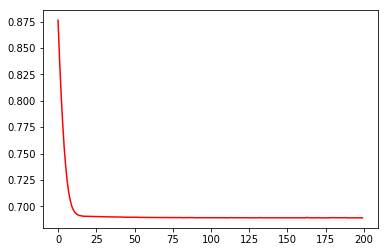

2258/2258 [==============================] - 0s 24us/step
train accuracy: 0.5469441890610964
247/247 [==============================] - 0s 16us/step
test accuracy: 0.5141700401238585


In [30]:
hidden_units = 20
activation = 'sigmoid'
penalize = 0.01
learning_rate = 0.001
epochs = 200
batch_size = 200 

model = models.Sequential()


# hidden layer
model.add(layers.Dense(input_dim = 25,
                       units = hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim = hidden_units,
                       units = 1,
                       activation=activation))

# loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new['move close'], epochs=epochs, batch_size=batch_size) 

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

train_acc = model.evaluate(x_train_new, y_train_new['move close'], batch_size = batch_size)[1]
print('train accuracy: %s' % train_acc)
test_acc = model.evaluate(x_test_new, y_test_new['move close'], batch_size = 32)[1]
print('test accuracy: %s' % test_acc)

# 最後想法
1. 個人認為每天的股價關係大部分的時間比較接近獨立的關係，所以要由每日股價推斷未來股價資訊可能太少了，需要其他更有力的資訊。
2. 目前許多事情、科技發展的速度太快，可能短短幾年變化便很巨大，因此可能過去的經濟模型無法套用到現在，在此的作法便是用過去模型預測現在，有可隨著時間影響過去的模型有辦法預測過去但無法預測未來。
3. 想要靠預測股票賺大錢不是那麼簡單，每天都猜會漲的結果就幾乎把我train的模型都打趴了XD